In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

import tensorflow as tf
from tensorflow.keras.models import model_from_json

import imageio
import folium
import folium.plugins as plugins
# from mpl_toolkits.basemap import Basemap

import time

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
df = pd.DataFrame()
for chunk in pd.read_csv('review_tester.csv',chunksize=100000):
    df = df.append(chunk)

In [5]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,NaN,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5.0,0.0,0.0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,NaN,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1.0,1.0,0.0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,NaN,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,NaN,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,NaN,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0.0,0.0,0.0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57
...,...,...,...,...,...,...,...,...,...,...
8021117,NaN,LAzw2u1ucY722ryLEXHdgg,6DMFD3BRp-MVzDQelRx5UQ,XW2kaXdahICaJ27A0dhGHg,1.0,1.0,0.0,1.0,"Fricken unbelievable, I ordered 2 space heater...",2019-12-11 01:07:06
8021118,NaN,gMDU14Fa_DVIcPvsKtubJA,_g6P8H3-qfbz1FxbffS68g,IsoLzudHC50oJLiEWpwV-w,3.0,1.0,3.0,1.0,Solid American food with a southern comfort fl...,2019-12-10 04:15:00
8021119,NaN,EcY_p50zPIQ2R6rf6-5CjA,Scmyz7MK4TbXXYcaLZxIxQ,kDCyqlYcstqnoqnfBRS5Og,5.0,15.0,6.0,13.0,I'm honestly not sure how I have never been to...,2019-06-06 15:01:53
8021120,NaN,-z_MM0pAf9RtZbyPlphTlA,lBuAACBEThaQHQGMzAlKpg,VKVDDHKtsdrnigeIf9S8RA,3.0,2.0,0.0,0.0,Food was decent but I will say the service too...,2018-07-05 18:45:21


# Reviews EDA

CxDOIDnH8gp9KXzpBHJYXw    4331
bLbSNkLggFnqwNNzzq-Ijw    2555
ELcQDlf69kb-ihJfxZyL0A    2039
PKEzKWv_FktMm2mGPjwd0Q    1972
DK57YibC5ShBmqQl97CKog    1817
U4INQZOPSUaj8hMjLlZ3KA    1762
hWDybu_KvYLSdEFzGrniTw    1602
QJI9OSEn6ujRCtrX06vs1w    1499
d_TBs6J3twMy9GChqUEXkg    1424
YRcaNlwQ6XXPFDXWtuMGdA    1263
Name: user_id, dtype: int64


C:\Users\ALOYY\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



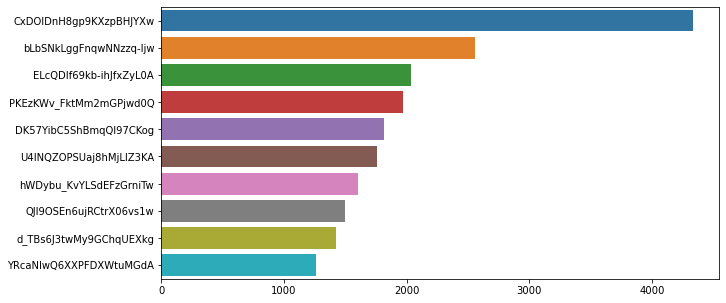

In [39]:
# User count

userCount = df['user_id'].value_counts()[:10]

print(userCount)

plt.figure(figsize=(10,5))
sns.barplot(userCount.values,userCount.index)
plt.show()

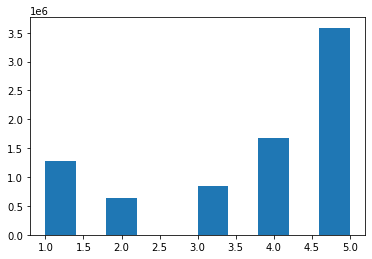

In [27]:
# star count
print(df['stars'].value_counts())

plt.hist(df['stars'],bins=10)
plt.show()

Useful Counts: 
0.0     4337407
1.0     1725147
2.0      786918
3.0      406057
4.0      231336
5.0      143601
6.0       94140
7.0       64424
8.0       46873
9.0       34498
10.0      25946
Name: useful, dtype: int64
Funny Counts: 
0.0     6419321
1.0      972329
2.0      290753
3.0      125063
4.0       65909
5.0       39492
6.0       25212
7.0       17495
8.0       12758
9.0        9330
10.0       7053
Name: funny, dtype: int64
Cool Counts: 
0.0     6056599
1.0     1206763
2.0      360161
3.0      146391
4.0       74602
5.0       44281
6.0       28930
7.0       20297
8.0       14541
9.0       10923
10.0       8370
Name: cool, dtype: int64


C:\Users\ALOYY\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



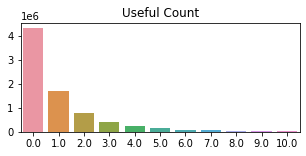

C:\Users\ALOYY\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



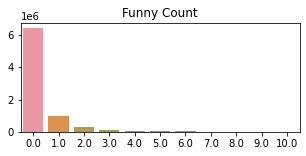

C:\Users\ALOYY\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



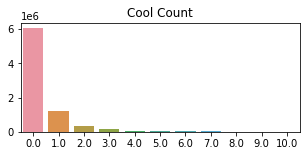

In [67]:
# useful count

usefulCount = df['useful'].value_counts()[:10]
funnyCount = df['funny'].value_counts()[:10]
coolCount = df['cool'].value_counts()[:10]

print('Useful Counts: ')
print(usefulCount)
print('Funny Counts: ')
print(funnyCount)
print('Cool Counts: ')
print(coolCount)

plt.figure(figsize=(5,2))
sns.barplot(usefulCount.index,usefulCount.values)
plt.title('Useful Count')
plt.show()

plt.figure(figsize=(5,2))
sns.barplot(funnyCount.index,funnyCount.values)
plt.title('Funny Count')
plt.show()

plt.figure(figsize=(5,2))
sns.barplot(coolCount.index,coolCount.values)
plt.title('Cool Count')
plt.show()

In [81]:
corr = df.loc[:,['useful','funny','cool']].corr()

<AxesSubplot:>

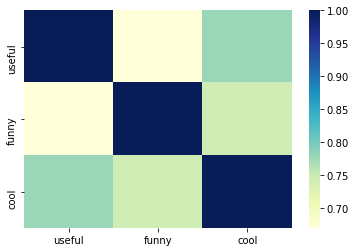

In [82]:
sns.heatmap(corr,cmap ="YlGnBu")

0.0     6419321
1.0      972329
2.0      290753
3.0      125063
4.0       65909
5.0       39492
6.0       25212
7.0       17495
8.0       12758
9.0        9330
10.0       7053
Name: funny, dtype: int64


C:\Users\ALOYY\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



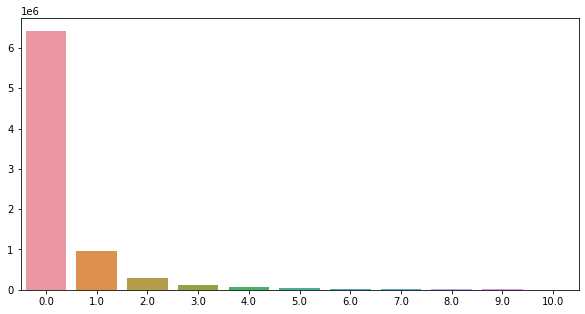

In [45]:
# funny count

funnyCount = df['funny'].value_counts()[:10]

print(funnyCount)

plt.figure(figsize=(10,5))
sns.barplot(funnyCount.index,funnyCount.values)
plt.show()

# Filtering out restaurants in Las Vegas

In [6]:
business_csv = 'yelp_business.csv'
business = pd.read_csv(business_csv)

review = df

In [8]:
business

,Unnamed: 0,business_id,latitude,longitude,stars,review_count,categories
0,0,fnZrZlqW1Z8iWgTVDfv_MA,36.099738,-115.301568,2.5,15,"Mexican, Restaurants, Fast Food"
1,1,fhNf_sg-XzZ3e7HEVGuOZg,36.071196,-115.207463,3.0,10,"Burgers, Restaurants, American (Traditional), ..."
2,2,OLciBerMDmD_WYzfYbmkqA,36.110799,-115.172507,3.5,4,"Nightlife, Arts & Entertainment, Bars, Lounges..."
3,3,OWkS1FXNJbozn-qPg3LWxg,36.128561,-115.171130,4.5,11,"Food, Food Trucks, Restaurants, Pizza"
4,4,MTx-Zdl_KcU_z9G832XAjg,36.307495,-115.279059,2.5,37,"Fast Food, Restaurants"
...,...,...,...,...,...,...,...
10897,10897,tv-WIUQifcp5J9pUKoiE3Q,36.076518,-115.153343,4.0,69,"Food, Asian Fusion, Food Trucks, Restaurants"
10898,10898,kGVAle6VpDvZHlEeTB2WhA,36.035739,-115.171471,4.0,10,"Delis, Restaurants, Sandwiches, Food, Pizza"
10899,10899,aJK0MWXKgXIgQUCM9fqSJQ,36.129782,-115.274674,3.5,69,"Pizza, Italian, Restaurants"
10900,10900,5VXlHFrYZZzj7zfZEsz5nQ,36.105289,-115.174037,3.0,279,"Chinese, Restaurants"


In [9]:
b_id = list(business['business_id'])

In [14]:
filteredReview = review[review['business_id'].isin(b_id)]

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3,NaN,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
16,NaN,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1.0,0.0,0.0,0.0,10pm on a super bowl Sunday and they're alread...,2015-02-02 06:28:00
21,NaN,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5.0,0.0,0.0,0.0,Holy heck this place is amazing. I love their ...,2017-02-09 04:25:03
24,NaN,XvLG7ReC8JZmBltOLJzfcA,-Co-ReNx_lXT1xL_Rr0B2g,XZbuPXdyA0ZtTu3AzqtQhg,4.0,0.0,1.0,0.0,"As the previous person posted, what more can r...",2009-10-13 09:50:48
30,NaN,WGbtqQMeJwTVg6DFb156EQ,K5MSNpwRf0xKQSaC6gK9Cw,PL3cimEUfNHlenOGSOAdJg,4.0,3.0,0.0,1.0,"This was our choice, by default, for New Year'...",2017-01-02 05:24:56
...,...,...,...,...,...,...,...,...,...,...
8021104,NaN,bifI5vnJ_LT0eAMD_O3cbw,1z0yKHr5KBlfJqm6O11V4g,9fUCrtgpHsC14bp8-uhfmQ,5.0,0.0,0.0,0.0,"Amazing , their flavors in their food are phen...",2019-12-06 08:47:32
8021105,NaN,T34JvlaKD1qcQARVOOHm4w,7puz3FPymI83yvk1_J7ilQ,AUOlDSQ8R2wIkN4lQ4kVDg,1.0,2.0,1.0,0.0,I really love Peruvian food and my ppl but thi...,2018-02-13 01:36:07
8021109,NaN,SkiPC10TBymnU-y8ScdQ_w,23cjtl3AWJtxKL3O78-Djw,e6ls6aHFa75xKEZUQUu1QQ,4.0,0.0,0.0,0.0,Tasty ramen with sushi options as well. The ch...,2019-12-08 00:49:06
8021113,NaN,cPX3OKqbv3-9ZYZTp_UKyA,bH3Uc0YNlnKubj8cT4nQ0w,H8qpFitIesth86zqR4cwYg,5.0,43.0,40.0,45.0,"Confections, cash, and casinos! Welcome to Las...",2017-01-10 04:18:30


In [ ]:
filteredReview.to_csv('yelp_review.csv')